<a href="https://colab.research.google.com/github/itskashish/Bengaluru_house_price_prediction/blob/main/Copy_of_CREDIT_CARD_FRAUD_DETECTION_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
## DATA DESCRIPTION

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47623,43281,-0.696585,1.108944,1.413769,-0.127104,0.018555,-0.455078,0.587554,0.113729,-0.121544,...,-0.239606,-0.547457,0.045935,0.029361,-0.228841,0.108686,0.388269,0.173609,5.49,0.0
47624,43282,-0.282262,-1.212401,2.174897,-0.181501,-1.604027,-0.332694,-1.154018,0.223029,0.605392,...,-0.444623,-0.224011,0.728520,0.958983,-0.712869,0.908167,-0.054453,-0.107284,10.00,0.0
47625,43282,-1.513495,-0.206282,-0.702405,1.056423,1.058711,-0.708973,0.611571,0.249949,-0.844057,...,0.089904,0.723147,1.244035,-0.526450,-0.267320,-0.336504,0.398350,-0.017047,89.99,0.0
47626,43282,-0.659193,1.270953,0.946464,-0.370180,1.619207,-0.288297,1.588317,-0.492843,-0.829508,...,-0.060858,-0.028588,-0.704004,-0.971430,1.036058,-0.329102,-0.276970,-0.183521,0.99,0.0


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
47623,43281,-0.696585,1.108944,1.413769,-0.127104,0.018555,-0.455078,0.587554,0.113729,-0.121544,...,-0.239606,-0.547457,0.045935,0.029361,-0.228841,0.108686,0.388269,0.173609,5.49,0.0
47624,43282,-0.282262,-1.212401,2.174897,-0.181501,-1.604027,-0.332694,-1.154018,0.223029,0.605392,...,-0.444623,-0.224011,0.728520,0.958983,-0.712869,0.908167,-0.054453,-0.107284,10.00,0.0
47625,43282,-1.513495,-0.206282,-0.702405,1.056423,1.058711,-0.708973,0.611571,0.249949,-0.844057,...,0.089904,0.723147,1.244035,-0.526450,-0.267320,-0.336504,0.398350,-0.017047,89.99,0.0
47626,43282,-0.659193,1.270953,0.946464,-0.370180,1.619207,-0.288297,1.588317,-0.492843,-0.829508,...,-0.060858,-0.028588,-0.704004,-0.971430,1.036058,-0.329102,-0.276970,-0.183521,0.99,0.0
47627,43282,1.121749,-0.208202,0.660816,0.857988,-0.823614,-0.422509,-0.286708,0.098616,0.541126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47628 entries, 0 to 47627
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    47628 non-null  int64  
 1   V1      47628 non-null  float64
 2   V2      47628 non-null  float64
 3   V3      47628 non-null  float64
 4   V4      47628 non-null  float64
 5   V5      47628 non-null  float64
 6   V6      47628 non-null  float64
 7   V7      47628 non-null  float64
 8   V8      47628 non-null  float64
 9   V9      47628 non-null  float64
 10  V10     47628 non-null  float64
 11  V11     47628 non-null  float64
 12  V12     47628 non-null  float64
 13  V13     47628 non-null  float64
 14  V14     47628 non-null  float64
 15  V15     47628 non-null  float64
 16  V16     47628 non-null  float64
 17  V17     47627 non-null  float64
 18  V18     47627 non-null  float64
 19  V19     47627 non-null  float64
 20  V20     47627 non-null  float64
 21  V21     47627 non-null  float64
 22

In [ ]:
df.shape

(47628, 31)

In [ ]:
## CHECK FOR MISSING/NULL VALUES

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
## DISTRIBUTION/SPREAD OF DATA ACROSS LEGIT AND FRAUDULENT TRANSACTION

In [ ]:
df['Class'].value_counts()

,count
Class,
0.0,47481
1.0,146


In [ ]:
## THIS DATA IS HIGHLY UNBALANCED ==> SEPERATING DATA FOR ANALYSIS

In [ ]:
#1 ==> FRAUDULENT
#0 ==> LEGIT

In [ ]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [ ]:
fraud.shape

(146, 31)

In [ ]:
legit.shape

(47481, 31)

In [ ]:
## STATISTICAL INFO ABT DATA

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,...,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000
mean,28183.123562,-0.240703,0.021469,0.694689,0.191074,-0.249837,0.102310,-0.119867,0.053450,0.141204,...,-0.027059,-0.107091,-0.039399,0.007890,0.136314,0.022561,0.004907,0.004021,91.777163,0.003065
std,13001.722320,1.884794,1.626518,1.519894,1.402196,1.412854,1.309931,1.282101,1.216930,1.214104,...,0.737251,0.637200,0.579666,0.594175,0.438367,0.502411,0.388191,0.335275,249.818013,0.055283
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,20517.000000,-0.990001,-0.548684,0.220594,-0.714455,-0.857297,-0.636473,-0.602224,-0.146950,-0.597975,...,-0.231991,-0.528167,-0.179247,-0.322459,-0.128057,-0.329467,-0.063838,-0.006862,7.590000,0.000000
50%,32930.500000,-0.248789,0.085468,0.800243,0.195142,-0.282244,-0.152017,-0.074952,0.057092,0.026153,...,-0.069134,-0.081945,-0.051439,0.061661,0.175871,-0.068195,0.008665,0.021873,24.990000,0.000000
75%,38236.000000,1.156434,0.736933,1.432158,1.070576,0.286638,0.492728,0.425886,0.329612,0.837269,...,0.107256,0.306116,0.078475,0.401231,0.421741,0.302743,0.083933,0.076168,83.110000,0.000000
max,43282.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


In [ ]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.0
mean,26650.410959,-7.748350,5.502036,-10.507153,6.017631,-5.734345,-2.290523,-8.141188,3.800624,-3.626437,...,0.881448,-0.228124,-0.286066,-0.085893,0.253943,0.167237,0.616539,0.037065,100.769589,1.0
std,12843.529116,8.479682,4.324454,8.664218,2.716844,6.581389,1.541204,6.925157,5.560692,2.591291,...,1.372088,0.858301,1.825277,0.542271,1.051684,0.370253,1.284066,0.651756,234.865142,0.0
min,406.000000,-30.552380,-5.198360,-31.103685,0.817253,-22.105532,-4.977692,-21.922811,-3.277535,-9.283925,...,-2.475962,-2.288686,-19.254328,-1.632653,-4.781606,-0.657488,-3.908080,-1.869290,0.000000,1.0
25%,14092.750000,-14.400619,2.595738,-16.529397,4.012860,-10.249202,-3.171506,-14.686141,0.200521,-5.705764,...,0.275675,-0.691248,-0.596924,-0.393981,-0.257868,-0.207671,0.171625,-0.168420,1.000000,1.0
50%,27518.000000,-4.296024,4.348210,-7.479750,6.104841,-3.829080,-2.435306,-6.850083,1.411247,-3.732442,...,0.969561,-0.122859,-0.136185,0.056627,0.157026,0.230135,0.623575,0.213774,8.370000,1.0
75%,40911.500000,-1.790742,8.025219,-4.065669,7.539507,-0.926569,-1.279542,-2.182413,5.459847,-2.008358,...,1.812058,0.362975,0.206452,0.258516,1.042712,0.514236,1.521848,0.467265,99.990000,1.0
max,43028.000000,1.234235,16.713389,2.041003,11.927512,5.269255,3.628382,5.431271,20.007208,2.820829,...,3.147428,1.745315,2.661291,0.795190,2.208209,0.816762,3.052358,1.130625,1809.680000,1.0


In [ ]:
legit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,47481.000000,47481.000000,47481.000000,47481.000000,47481.000000,47481.000000,47481.000000,47481.000000,47481.000000,47481.000000,...,47481.000000,47481.000000,47481.000000,47481.000000,47481.000000,47481.000000,47481.000000,47481.000000,47481.000000,47481.0
mean,28187.518523,-0.217647,0.004622,0.729134,0.173144,-0.232960,0.109679,-0.095198,0.041927,0.152781,...,-0.029852,-0.106718,-0.038640,0.008178,0.135952,0.022116,0.003026,0.003920,91.749512,0.0
std,13002.013130,1.780439,1.582401,1.304200,1.358300,1.333143,1.302425,1.141909,1.160932,1.189251,...,0.732745,0.636378,0.571563,0.594310,0.435128,0.502702,0.380744,0.333848,249.864438,0.0
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-4.532523,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.0
25%,20554.000000,-0.984903,-0.551646,0.227686,-0.717310,-0.852152,-0.632479,-0.598321,-0.147176,-0.593491,...,-0.232226,-0.527581,-0.178719,-0.322426,-0.127897,-0.329751,-0.063936,-0.006839,7.600000,0.0
50%,32937.000000,-0.243460,0.082375,0.804550,0.189791,-0.280767,-0.149733,-0.073256,0.056466,0.029638,...,-0.069627,-0.081653,-0.051378,0.061661,0.175940,-0.068979,0.008394,0.021830,24.990000,0.0
75%,38232.000000,1.157029,0.730504,1.434274,1.062461,0.287200,0.495193,0.427422,0.327221,0.840378,...,0.105614,0.305847,0.078366,0.401367,0.421271,0.301192,0.083101,0.075605,83.000000,0.0
max,43282.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,18.709255,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,0.0


In [ ]:
legit.Amount.describe()

,Amount
count,47481.000000
mean,91.749512
std,249.864438
min,0.000000
25%,7.600000
50%,24.990000
75%,83.000000
max,12910.930000


In [ ]:
fraud.Amount.describe()

,Amount
count,146.000000
mean,100.769589
std,234.865142
min,0.000000
25%,1.000000
50%,8.370000
75%,99.990000
max,1809.680000


In [ ]:
## COMPARE VALUES FOR BOTH TRANSACTIONS

In [ ]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,28187.518523,-0.217647,0.004622,0.729134,0.173144,-0.232960,0.109679,-0.095198,0.041927,0.152781,...,0.046262,-0.029852,-0.106718,-0.038640,0.008178,0.135952,0.022116,0.003026,0.003920,91.749512
1.0,26650.410959,-7.748350,5.502036,-10.507153,6.017631,-5.734345,-2.290523,-8.141188,3.800624,-3.626437,...,0.471417,0.881448,-0.228124,-0.286066,-0.085893,0.253943,0.167237,0.616539,0.037065,100.769589


In [ ]:
## TO HANDLE THIS UNBALANCED DS - DATA SAMPLING IS DONE
# no. of fraud transactions --> 146
## UNDERSAMPLING IS DONE TO HV EVEN NO. OF TRANSACTIONS AND TRAIN THE ML MODEL

In [ ]:
legit_sample = legit.sample(n=146)

In [ ]:
new_df = pd.concat([legit_sample,fraud],axis=0)

In [ ]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
22729,32404,-2.170640,-2.151372,1.513747,-1.022984,1.784026,-2.682317,-1.213508,0.069631,-1.145450,...,-0.328256,-1.181721,0.540872,0.367689,-0.340344,0.655263,0.187150,0.230436,15.45,0.0
39291,39774,-0.660300,0.428217,2.899560,1.687313,-0.574644,0.913424,0.538237,0.112596,0.471350,...,-0.345228,-0.471205,-0.012705,0.397675,0.175250,-0.379322,-0.028584,-0.129606,81.00,0.0
1102,855,0.694632,-1.068930,1.944016,1.930746,-1.933856,0.496387,-1.007379,0.322900,1.926236,...,0.216864,0.731955,-0.282828,0.792686,0.470928,-0.154661,0.088205,0.077180,196.46,0.0
28383,34982,-1.377891,1.534698,0.027953,-1.119949,0.249626,0.313811,-0.047759,1.027912,-0.397214,...,-0.193452,-0.567406,-0.197763,-1.353608,0.108834,0.389496,0.157573,0.088043,4.00,0.0
44781,42081,1.049733,0.136555,0.449469,1.157467,-0.209275,-0.176174,0.026444,0.050237,-0.328057,...,0.191726,0.511548,-0.107635,0.248633,0.535006,-0.286754,0.024319,0.018623,47.79,0.0


In [ ]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
45203,42247,-2.524012,2.098152,-4.946075,6.456588,3.173921,-3.058806,-0.184710,-0.390420,-3.649812,...,0.027935,0.220366,0.976348,-0.290539,1.161002,0.663954,0.456023,-0.405682,1.00,1.0
45732,42474,-3.843009,3.375110,-5.492893,6.136378,2.797195,-2.646162,-1.668931,-2.617552,-3.945843,...,-1.277812,0.719652,0.451125,-0.258094,0.656129,0.556676,0.739383,-0.203050,1.00,1.0
46909,42985,-4.075975,0.963031,-5.076070,4.955963,-0.161437,-2.832663,-7.619765,1.618895,-2.992092,...,1.030738,0.165328,-1.017502,-0.477983,-0.304987,-0.106089,1.899714,0.511462,1.00,1.0
46918,42988,-4.423508,1.648048,-6.934388,4.894601,-5.078131,0.010849,-3.409096,1.409291,-3.260672,...,0.698359,0.487478,1.228698,-0.535217,0.388278,-0.009466,2.300164,0.081231,648.00,1.0
46998,43028,-1.109646,0.811069,-1.138135,0.935265,-2.330248,-0.116106,-1.621986,0.458028,-0.912189,...,0.641594,0.841755,0.176728,0.081004,-0.258899,0.707654,0.418649,0.080756,204.27,1.0


In [ ]:
##NOW CHECKING DATA STATISTICS USING THIS BALANCED DATASET

In [ ]:
new_df['Class'].value_counts()

,count
Class,
0.0,146
1.0,146


<Axes: xlabel='Class', ylabel='count'>

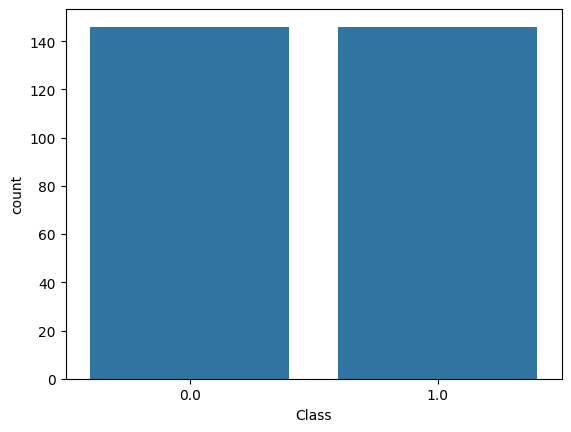

In [ ]:
sns.countplot(x='Class',data=new_df)

In [ ]:
## CHECKING IF WE GOT A GOOD SAMPLE OR A BAD SAMPLE

In [ ]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,28962.328767,-0.494346,0.134395,0.805862,0.361148,-0.505070,0.268106,-0.064841,0.133687,0.246000,...,-0.069421,-0.000823,-0.137980,0.041575,0.011461,0.140580,0.049879,0.035044,-0.013489,108.841507
1.0,26650.410959,-7.748350,5.502036,-10.507153,6.017631,-5.734345,-2.290523,-8.141188,3.800624,-3.626437,...,0.471417,0.881448,-0.228124,-0.286066,-0.085893,0.253943,0.167237,0.616539,0.037065,100.769589


In [ ]:
##SPLITTING INTO TARGET AND FEATURES

In [ ]:
X = new_df.drop(['Class'],axis=1)  #FEATURES
Y = new_df['Class']                #TARGET

In [ ]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
22729,32404,-2.170640,-2.151372,1.513747,-1.022984,1.784026,-2.682317,-1.213508,0.069631,-1.145450,...,0.306157,-0.328256,-1.181721,0.540872,0.367689,-0.340344,0.655263,0.187150,0.230436,15.45
39291,39774,-0.660300,0.428217,2.899560,1.687313,-0.574644,0.913424,0.538237,0.112596,0.471350,...,0.230357,-0.345228,-0.471205,-0.012705,0.397675,0.175250,-0.379322,-0.028584,-0.129606,81.00
1102,855,0.694632,-1.068930,1.944016,1.930746,-1.933856,0.496387,-1.007379,0.322900,1.926236,...,0.200286,0.216864,0.731955,-0.282828,0.792686,0.470928,-0.154661,0.088205,0.077180,196.46
28383,34982,-1.377891,1.534698,0.027953,-1.119949,0.249626,0.313811,-0.047759,1.027912,-0.397214,...,0.033913,-0.193452,-0.567406,-0.197763,-1.353608,0.108834,0.389496,0.157573,0.088043,4.00
44781,42081,1.049733,0.136555,0.449469,1.157467,-0.209275,-0.176174,0.026444,0.050237,-0.328057,...,-0.066564,0.191726,0.511548,-0.107635,0.248633,0.535006,-0.286754,0.024319,0.018623,47.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,42247,-2.524012,2.098152,-4.946075,6.456588,3.173921,-3.058806,-0.184710,-0.390420,-3.649812,...,-0.162797,0.027935,0.220366,0.976348,-0.290539,1.161002,0.663954,0.456023,-0.405682,1.00
45732,42474,-3.843009,3.375110,-5.492893,6.136378,2.797195,-2.646162,-1.668931,-2.617552,-3.945843,...,0.054796,-1.277812,0.719652,0.451125,-0.258094,0.656129,0.556676,0.739383,-0.203050,1.00
46909,42985,-4.075975,0.963031,-5.076070,4.955963,-0.161437,-2.832663,-7.619765,1.618895,-2.992092,...,0.058861,1.030738,0.165328,-1.017502,-0.477983,-0.304987,-0.106089,1.899714,0.511462,1.00
46918,42988,-4.423508,1.648048,-6.934388,4.894601,-5.078131,0.010849,-3.409096,1.409291,-3.260672,...,-0.562264,0.698359,0.487478,1.228698,-0.535217,0.388278,-0.009466,2.300164,0.081231,648.00


In [ ]:
##SPLITTING INTO TRAINING AND TESTING DATA

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(292, 30) (233, 30) (59, 30)


In [ ]:
##MODEL TRAINING

In [ ]:
##USING LOGISTIC REGRESSION

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
##MODEL EVALUATION

In [ ]:
#ACCURACY SCORE ON TRAINING DATA

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [ ]:
print("ACCURACY SCORE ON TRAINING DATA IS :",training_data_accuracy)

ACCURACY SCORE ON TRAINING DATA IS : 0.9527896995708155


In [ ]:
## ACCURACY SCORE ON TESTING DATA - CRUCIAL

In [ ]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)


In [ ]:
print("ACCURACY SCORE ON TESTING DATA IS :",testing_data_accuracy)

ACCURACY SCORE ON TESTING DATA IS : 0.9830508474576272
